In [58]:
from IPython.display import HTML
from IPython.display import Image
from IPython.display import YouTubeVideo
from IPython.display import display, IFrame, Math, Latex
import scipy.stats as stats
import webbrowser
import warnings
warnings.filterwarnings("ignore")

In [3]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
#https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference

## Evaluating Models

- R-squared

- Mean Absolute Error (MAE)

- Mean Sauared Error (MSE)

*Residuals*

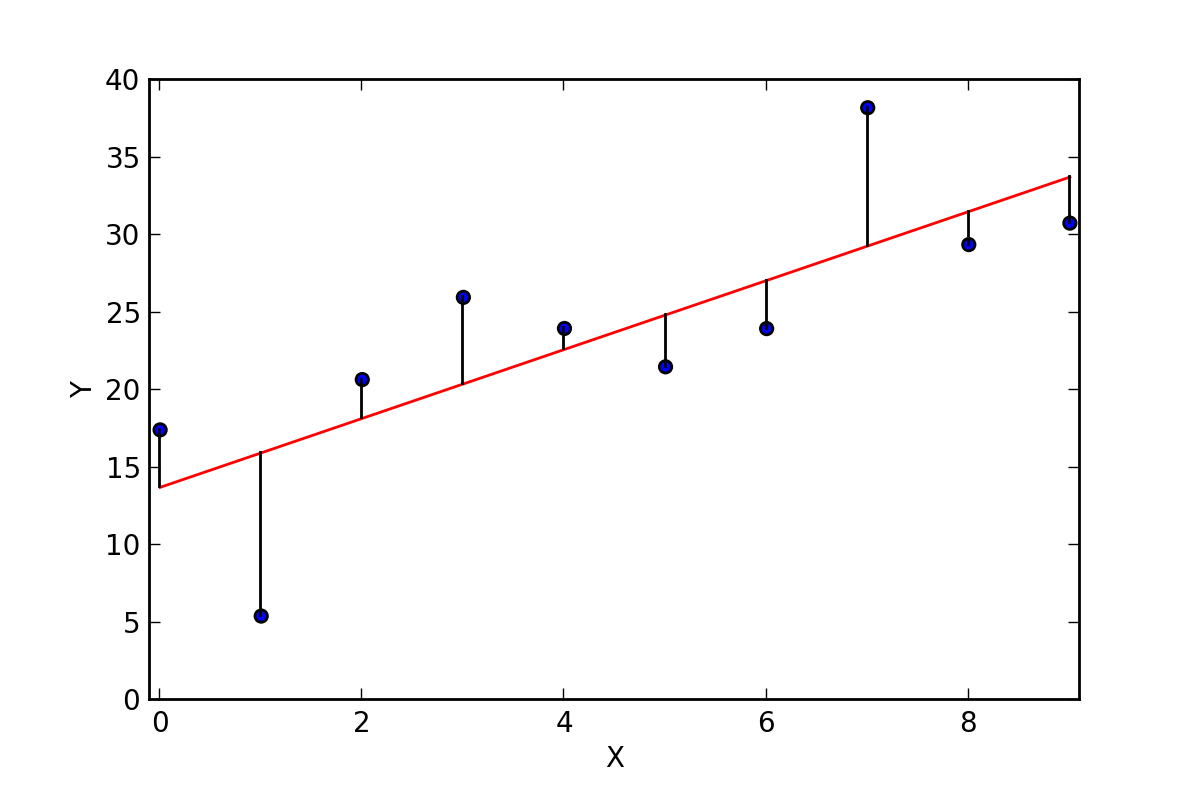

In [56]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png'
Image(url,width=500, height=300)


***MAE vs MSE***

- **MAE**: sum of absolute residuals over the number of points 
- **MSE**: sum of the residuals squared over the number of points

<img src='maeVmse.jpg' width="300" height="100" align="center">

*Typically: MSE is better in situations when your data contains outliers since by squaring the errors they are weighted more heavily. However, if you aren't as concerneed with outliers or singular observations MAE can be used to supress those observations a bit more since it involves taking the absolute values instead of squaring the errors.*


### Classification Techniques of Evaluation

<img src='type1type2.jpg' width="300" height="100" align="center">

- Precision
- Recall 
- Confusion Matrices

https://en.wikipedia.org/wiki/Confusion_matrix

<img src='confusion1.png' width="300" height="100" align="left">



**condition positive (P)**

the number of real positive cases in the data

**condition negative (N)**

the number of real negative cases in the data

**true positive (TP)**

eqv. with hit

**true negative (TN)**

eqv. with correct rejection

**false positive (FP)**

eqv. with false alarm, Type I error

**false negative (FN)**

eqv. with miss, Type II error



https://en.wikipedia.org/wiki/Sensitivity_and_specificity

<img src='sensitivity-specificity-noted.jpg' width="300" height="100" align="center">

**Sensitivity, recall, hit rate, or true positive rate (TPR)**
- Measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).
- Linked to the rate of type 2 errors 

In [59]:
Math(r'TPR = \frac{TP}    {TP+FN}=\frac{TP}    {P}=1-FNR_{False Negative Rate} ')

<IPython.core.display.Math object>

**Specificity, selectivity or true negative rate (TNR)**
- Measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

In [66]:
Math(r'TNR = \frac{TN}    {N}=\frac{TN}    {TN+FP}=1-FNR_{False Negative Rate} ')

<IPython.core.display.Math object>

**Precision or positive predictive value (PPV)**
- Percentage of observations correctly guessed  
- Linked to rate of type 1 error

In [62]:
Math(r'PPV = \frac{TP}    {TP+FP}')

<IPython.core.display.Math object>

**Negative predictive value (NPV)**


In [64]:
Math(r'NPV = \frac{TN}    {TN+FN}')

<IPython.core.display.Math object>



**Miss rate or false negative rate (FNR)**


In [65]:
Math(r'FNR = \frac{FN}    {P}=\frac{FN}    {FN+TP}=1-FPR_{False Positive Rate} ')

<IPython.core.display.Math object>

**Fall-out or false positive rate (FPR)**


In [68]:
Math(r'FPR = \frac{FP}    {N}=\frac{FP}    {FP+TN}=1-TNR')

<IPython.core.display.Math object>

**False discovery rate (FDR)**

In [69]:
Math(r'FDR = \frac{FP}    {FP+TP}=1-PPV_{+}')

<IPython.core.display.Math object>



**False omission rate (FOR)**


In [70]:
Math(r'FOR = \frac{FN}    {FN+TN}=1-NPV_{-}')

<IPython.core.display.Math object>

**Accuracy (ACC)**


In [71]:
Math(r'ACC = \frac{TP+TN}    {P+N}=\frac{TP+TM}    {TP+TN+FP+FN} ')

<IPython.core.display.Math object>



**F1 Score**

In [73]:
Math(r'F_{1} = 2*\frac{PPV*TPR}    {PPV+TPR}=\frac{2TP}    {2TP+FP+FN} ')

<IPython.core.display.Math object>

<img src='confusionMatrix.png' width="1000" height="100" align="center">

**Regression evaluation**

Let's revisit the linear regression model that you created with LinearRegression() and then trained with the fit() function a few exercises ago. Evaluate the performance your model, imported here as lm for you to call.

The weather data has been imported for you with the X and y variables as well, just like before. Let's get to calculating the R-squared, mean squared error, and mean absolute error values for the model.

In [83]:
weather=pd.read_csv('weatherAUS.csv')[:100]

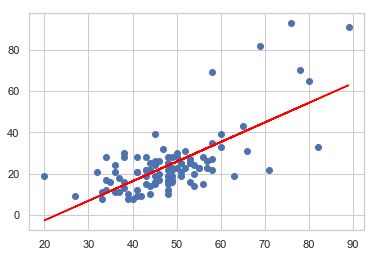

Correlation Coefficient: 0.9479585335141129
R-squared score: 0.48730975172295865
Means Squared Error: 125.2348469466329
Means Absolute Error: 8.050800250030953


In [82]:
weather=pd.read_csv('weatherAUS.csv')[:100]
from sklearn.linear_model import LinearRegression 
X = np.array(weather['Humidity9am']).reshape(-1,1)
y = weather['Humidity3pm']

# Create and fit your linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Assign and print predictions
preds = lm.predict(X)

# Plot your fit to visualize your model
plt.scatter(X, y)
plt.plot(X, preds, color='red')
plt.show()

# Assign and print coefficient 
coef = lm.coef_
print('Correlation Coefficient:',coef[0])

# R-squared score
r2 = lm.score(X,y)
print('R-squared score:',r2)

from sklearn.metrics import mean_squared_error, mean_absolute_error
preds = lm.predict(X)
# Mean squared error
mse = mean_squared_error(y, preds)
# Mean absolute error
mae = mean_absolute_error(y, preds)
print('Means Squared Error:',mse)
print('Means Absolute Error:',mae)

**Classification evaluation**

Moving forward with evaluation metrics, this time you'll evaluate our logistic regression model from before with the goal of predicting the binary RainTomorrow feature using humidity.

We have gone ahead and imported the model as clf and the same test sets assigned to the X_test and y_test variables. Generate and analyze the confusion matrix and then compute both precision and recall before making a conclusion.

In [84]:
weather=weather[['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow','Humidity9am','Humidity3pm']]
X=weather[['Humidity9am','Humidity3pm']]
y=weather[['RainTomorrow']]

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#X=preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and fit your model
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())


# Compute and print the accuracy
acc = clf.score(X_test, y_test)
print('Accuracy:',acc)

# Assign and print the coefficents
coefs = clf.coef_
print('Coefficients:',coefs)

# Generate and output the confusion matrix
from sklearn.metrics import confusion_matrix,precision_score,recall_score
preds = clf.predict(X_test)
matrix = confusion_matrix(y_test, preds)
precision = precision_score(y_test, preds,pos_label="Yes")
recall = recall_score(y_test, preds,pos_label="Yes")
print('Confusion Matrix:\n',matrix)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',2*((precision*recall)/(precision+recall)))

Accuracy: 0.9696969696969697
Coefficients: [[-0.06815201  0.08015784]]
Confusion Matrix:
 [[28  0]
 [ 1  4]]
Precision: 1.0
Recall: 0.8
F1 Score: 0.888888888888889


## Bias-variance tradeoff

<img src='bias_precision.png' width="300" height="100" align="left">

<img src='bias_variance.png' width="300" height="100" align="left">

**Types of error**: 
- Bias
    - Simplifying the assumptions of the model to make the target function easier to learn
    - Faster to learn and easier to understand
    - Typically more robust in nature and generalize well
    - Can lead to underfitting, model not representing the data well
        - Selection Bias
        - Confounding
        - Information Bias
    - *Machine Learning ex: Linear Regression, Logistic Regression, Linear discriminant analysis (LDA)*
- Variance
    - Amount the target function would change if different training data was used.
    - Too much variance would lead to the problem of overfitting
    - Too flexible and sensitive
    - Won't generalize well to unseen data
    - *Machine Learning ex: Decision Trees, Neural Networks, K-Nearest Neighbors, Support Vector Machines (SVM)*
- Irreducible error
    - multiple sources of error

### The Goal

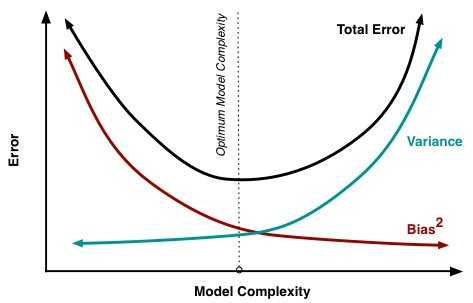

In [126]:
from IPython.display import Image
url = 'https://www.kdnuggets.com/wp-content/uploads/bias-variance-total-error.jpg'
Image(url,width=500, height=300)


*Assessing Fit from Machine Learning Training History Plot*

<img src='training_error.png' width="400" height="100" align="left">

### Exercise(s):

In terms of the bias-variance tradeoff, which of the following is substantially more harmful to the test error than the training error?
- Variance

**Visualizing the tradeoff**

We know that the bias-variance tradeoff serves as the basis for dealing with issues like overfitting and underfitting in machine learning.

In this final exercise, you'll revisit our weather dataset one last time by visualizing the difference between high bias and high variance models using the already imported preds and preds2 variables.

As a reminder, we are using the Temp9am feature to predict our dependent variable, the Temp3pm feature. The usual packages have been imported.

In [153]:
X=np.array([ 8.6, 14.2, 15.1, 17.5, 16.2,  5.8, 20.3,  2.5, 15.4, 22.2, 30.4,
       11. , 21.7, 25.5, 13.4, 25.2, 10.6, 26.7, 20.5])
y=np.array([11.5, 17. , 22.5, 24.3, 27.4, 18.8, 32. ,  8.6, 30.9, 30.7, 29.3,
       17.8, 25.6, 33.9, 19.2, 25.3, 15. , 21.7, 23.1])

In [158]:
preds=np.array([12.45724842, 14.82960776, 16.8425187 , 18.28031224, 18.56787094,
       20.29322318, 20.8683406 , 21.51534769, 21.73101672, 22.30613413,
       23.24069993, 25.25361088, 25.39739023, 26.26006635, 26.61951473,
       28.77620503, 28.99187406, 29.85455018, 32.51446822])
preds2=np.array([15.53525198, 15.53535007, 15.55148727, 15.72947367, 15.82907881,
       17.73831971, 19.20364488, 21.48164064, 22.37381012, 24.95533779,
       28.91800569, 28.68313159, 28.23278614, 26.59000134, 27.16358784,
       31.52912842, 28.1403767 , 22.11067348, 29.29891384])

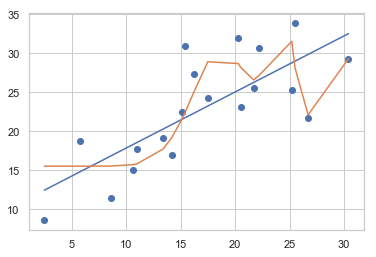

In [160]:
# Use X and y to create a scatterplot
plt.scatter(X, y)

# Add your model predictions to the scatter plot 
plt.plot(np.sort(X), preds)

# Add the higher-complexity model predictions as well
plt.plot(np.sort(X), preds2)
plt.show()

## Advice

- Simulate the interview environment
- Practice explaining big concepts
- Know the business / product well
- Come prepared with ideas

**Resources:**
- Data Science Career Resources Repo
- Practical Statistics for Data Scientists
- 120 Data Science Interview Questions
- Advice Applying to Data Science Jobs
